In [37]:
import numpy as np
import matplotlib.pylab as plt
import ot



In [38]:
from utils import simulate_dataset, format_dataset, simulate_dataset_UF
from repairs import DI_list_geometric_repair, DI_list_random_repair,DI_list_merge_repair
from sklearn.manifold import TSNE
from disparate import *

In [39]:
blue1 = '#1f77b4' # darker blue
blue2 = '#aec7e8' # lighter blue

# Two shades of red
red1 = '#d62728' # darker red
red2 = '#ff9896' # lighter red

light_green = '#90EE90'
dark_green = '#006400'

In [40]:
from scipy.stats import entropy
from numpy.linalg import norm

def KLD(P, Q, epsilon): 
     # a small positive constant
    _P = (P + epsilon) / norm(P + epsilon, ord=1) 
    _Q = (Q + epsilon) / norm(Q + epsilon, ord=1) 
    return entropy(_P, _Q)

In [41]:
# Parameters for the simulation
n0 = 200
n1 = 200
# mu0 = (3, 3, 2, 2.5, 3.5)
# mu1 = (4, 4, 3, 3.5, 4.5)
# sigma = np.diag([1, 1, 0.5, 0.5, 1])
# beta0 = (1, -1, -0.5, 1, -1)
# beta1 = (1, -0.4, 1, -1, 1)


mu0 = (3, 3)
mu1 = (6, 6)
mu2 = (4, 4)
mu3 = (7, 7)

sigma = np.diag([1, 1])
simga2 = np.diag([1, 1])
beta0 = (1, -1)
beta1 = (1, -.8)

# beta0 = [0.04644809540115112, 0.33421427802467]
# beta1 = [0.0283525492064916, 0.3650299292603575]

#betat is the probability of being in group 1


# # Simulate the dataset
X0, X1, Y0, Y1 = simulate_dataset(n0, n1, mu0, mu1, sigma, beta0, beta1)


In [42]:
# #unfair dataset
# prob  = 0.5
# prob1 = 0.6
# d  = 2
# #simulate unfair dataset
# X0_U, X1_U, Y0_U, Y1_U = simulate_dataset_UF(n0, n1, mu0, mu1, mu2, mu3, sigma, beta0, beta1,  prob,prob1, d)


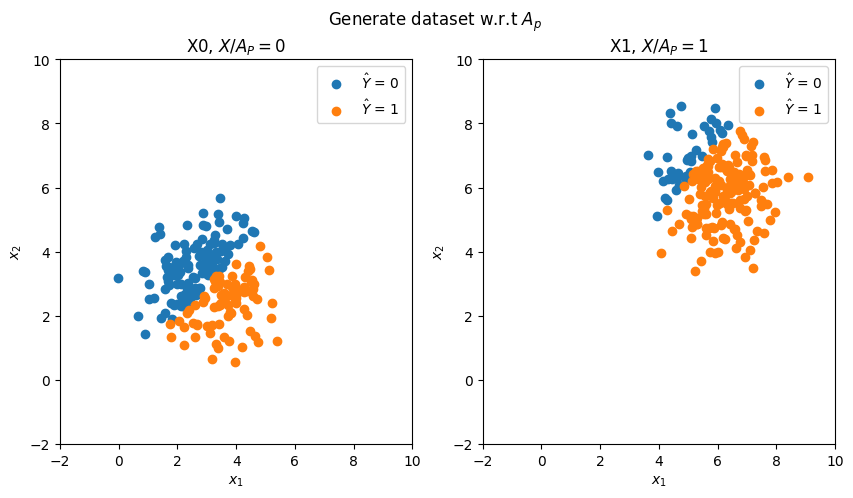

In [43]:

fig = plt.figure(figsize=(10, 5))
plt.suptitle('Generate dataset w.r.t $A_p$')
plt.subplot(121)
for i in range(2):
    plt.scatter(X0[Y0==i,0], X0[Y0==i,1], label=r'$\hat{Y}$ = %d'%i)

    plt.title(r'X0, $X/A_P=0$')
    plt.xlabel(r'$x_1$')
    plt.ylabel(r'$x_2$')
    plt.xlim(-2, 10)
    plt.ylim(-2, 10)
    plt.legend()
plt.subplot(122)

for i in range(2):
    plt.scatter(X1[Y1==i,0], X1[Y1==i,1], label=r'$\hat{Y}$ = %d'%i)
    plt.title(r'X1, $X/A_P=1$')
    plt.xlabel(r'$x_1$')
    plt.ylabel(r'$x_2$')
    plt.xlim(-2, 10)
    plt.ylim(-2, 10)
    plt.legend()
plt.show()


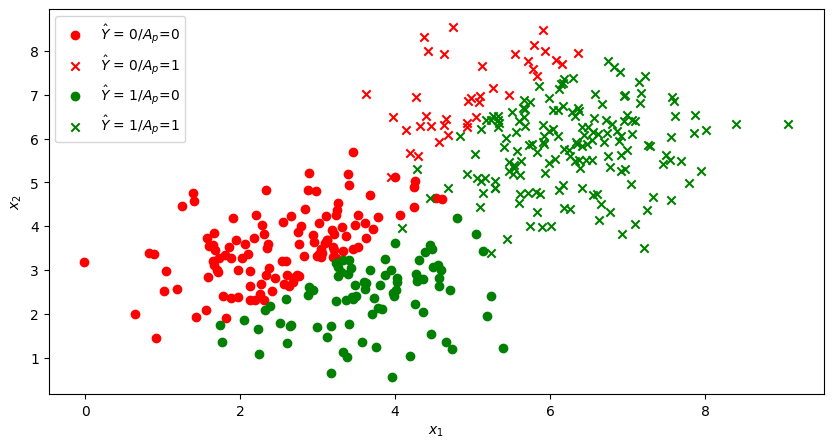

In [51]:
fig = plt.figure(figsize=(10, 5))
# plt.title(r'Observed Data $\mathbf{X}$, Unfair Domain')

colour = ['r', 'g']

for i in range(2):
    plt.scatter(X0[Y0==i,0], X0[Y0==i,1], marker = 'o', label=r'$\hat{Y}$ = %d'%i + r'/$A_p$=0', c=colour[i])
    plt.scatter(X1[Y1==i,0], X1[Y1==i,1], marker = 'x', label=r'$\hat{Y}$ = %d'%i + r'/$A_p$=1', c=colour[i])

plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')

plt.legend()
plt.show()



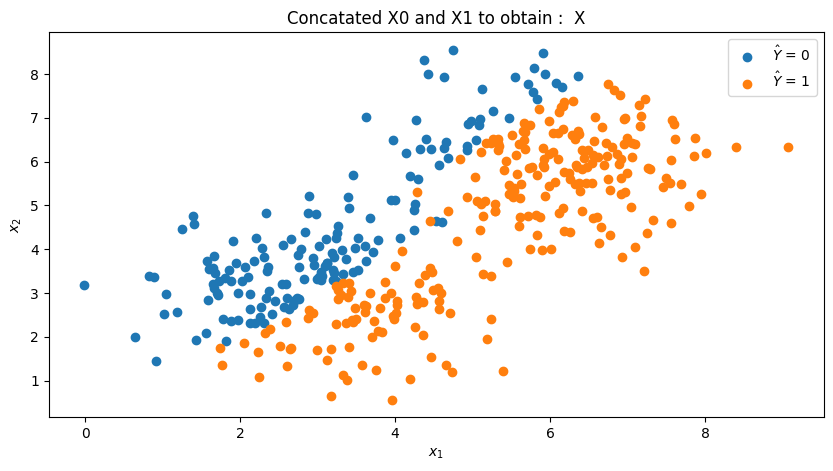

0.5414012738853503


In [45]:
#calculate the DI of the pre-repair dataset
X,Y = format_dataset(X0, X1, Y0, Y1 )

# plot X, Y

fig = plt.figure(figsize=(10, 5))

# plt.scatter(X[:,1], X[:,2], c=Y)
# plt.title(r'X/$A_$')
# plt.xlabel(r'$x_1$')
# plt.ylabel(r'$x_2$')
# plt.show()

for i in range(2):
    plt.scatter(X[Y==i,1], X[Y==i,2], label=r'$\hat{Y}$ = %d'%i)
    plt.title(r'Concatated X0 and X1 to obtain :  X')
    plt.xlabel(r'$x_1$')
    plt.ylabel(r'$x_2$')

    plt.legend()
plt.show()


from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=69).fit(X[:, 1:],(Y>0.5).astype(int))
Y_pred = clf.predict(X[:, 1:])


DI = disparate(X,Y_pred,0)

# for i in range(2):
#     plt.scatter(X[Y_pred==i,1], X[Y_pred==i,2], label=r'$\hat{Y}$ = %d'%i)

#     plt.title('Pre-Repair Dataset X')
#     plt.xlabel(r'$x_1$')
#     plt.ylabel(r'$x_2$')
#     plt.legend()

# plt.show()

print (DI[1])

In [46]:
X_U,Y_U = format_dataset(X0_U, X1_U, Y0_U, Y1_U )

# plot X, Y

fig = plt.figure(figsize=(10, 5))

plt.scatter(X_U[:,1], X_U[:,2], c=Y_U)
plt.title(r'X/$A_p=0$')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.show()

from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=69).fit(X_U[:, 1:],(Y_U>0.5).astype(int))
Y_pred = clf.predict(X_U[:, 1:])


DI = disparate(X_U,Y_pred,0)
print (DI[1])



NameError: name 'X0_U' is not defined

In [ ]:
#Y_pred for X0
Y_pred0_X0 = clf.predict(X0)
Y_pred1_X1 = clf.predict(X1)

p0 = np.sum(Y_pred0_X0 == 1) / len(Y_pred0_X0)
p01 = 1-p0
p =  np.array([p0, p01])
p1 = np.sum(Y_pred1_X1 == 1) / len(Y_pred1_X1)
p11 = 1-p1
q =  np.array([p1, p11])

eps = 1e-8
kld = KLD(p, q, eps)
print(kld)


#kld 
# Compute the proportion of predicted positive outcomes in each sample
p0 = np.sum(Y_pred0_X0 == 1) / len(Y_pred0_X0)
p1 = np.sum(Y_pred1_X1 == 1) / len(Y_pred1_X1)

# Compute the KLD
kld = p0 * np.log2(p0 / p1) + (1 - p0) * np.log2((1 - p0) / (1 - p1))

print(f"KLD: {kld}")





ValueError: X has 3 features, but LogisticRegression is expecting 2 features as input.

In [ ]:
#repair the dataset

iter= 100
DIs, X0r, X1r, y0r, y1r=DI_list_geometric_repair(X0,X1, beta0,beta1,iter )


ValueError: too many values to unpack (expected 5)

In [ ]:

DI_list = DI_list_merge_repair(X0, X1, beta0, beta1, iter)

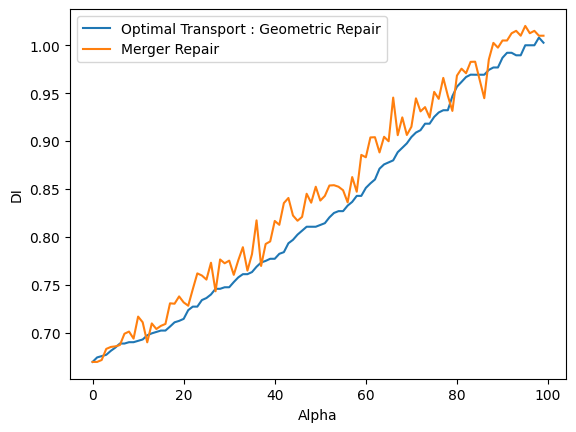

In [ ]:
#plot DIs DI list
plt.plot(DIs, label='Optimal Transport : Geometric Repair')
# plt.plot(alpha_range,DIs_rand, label='Optimal Transport : Random Repair')
plt.plot( DI_list, label='Merger Repair')
plt.ylabel('DI')
plt.xlabel('Alpha')
plt.legend()	
plt.show()


In [ ]:
#---format the repaired dataset
X,Y = format_dataset(X0r, X1r, y0r, y1r)

#----train the model on the repaired dataset
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=69).fit(X[:, 1:],(Y>0.5).astype(int))
Y_pred = clf.predict(X[:, 1:])


#split the data into X0 and X1, for plotting
X0r = X[X[:,0]==0][:,1:]
X1r = X[X[:,0]==1][:,1:]

y0r = Y_pred[X[:,0]==0]
y1r = Y_pred[X[:,0]==1]



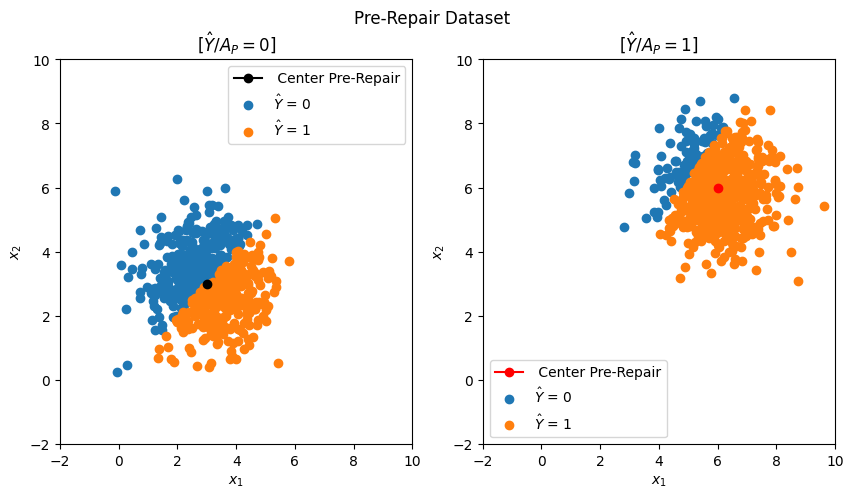

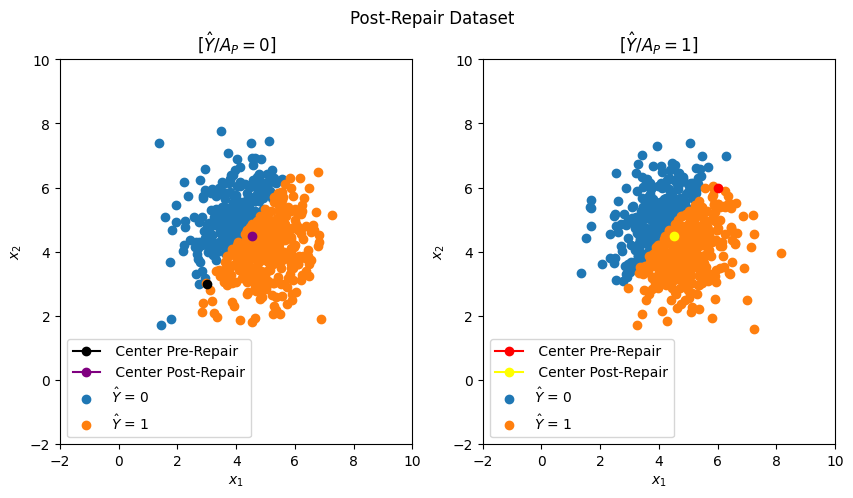

In [ ]:

#plot pre-repair and post-repair datasets
fig = plt.figure(figsize=(10, 5))
plt.suptitle('Pre-Repair Dataset ')
plt.subplot(121)
plt.plot(3,3, marker = 'o', color = 'Black', label = ' Center Pre-Repair')
for i in range(2):
    plt.scatter(X0[Y0==i,0], X0[Y0==i,1], label=r'$\hat{Y}$ = %d'%i)
    
    plt.title(r'[$\hat{Y}/A_P=0$]')
    plt.xlabel(r'$x_1$')
    plt.ylabel(r'$x_2$')
    plt.xlim(-2, 10)
    plt.ylim(-2, 10)
    plt.legend()
plt.subplot(122)
plt.plot(6,6, marker = 'o', color = 'Red', label = ' Center Pre-Repair')

for i in range(2):
    plt.scatter(X1[Y1==i,0], X1[Y1==i,1], label=r'$\hat{Y}$ = %d'%i)
    plt.title(r'[$\hat{Y}/A_P=1$]')
    plt.xlabel(r'$x_1$')
    plt.ylabel(r'$x_2$')
    plt.xlim(-2, 10)
    plt.ylim(-2, 10)
    plt.legend()

plt.show()


#plot the repaired dataset
fig = plt.figure(figsize=(10, 5))

plt.suptitle('Post-Repair Dataset ')
plt.subplot(121)
plt.plot(3,3, marker = 'o', color = 'Black', label = ' Center Pre-Repair')
center_repairX0 = np.mean(X0r, axis=0)
center_repairX1 = np.mean(X1r, axis=0)
plt.plot(center_repairX0[0],center_repairX0[1], marker = 'o', color = 'Purple', label = ' Center Post-Repair')
for i in range(2):
    plt.scatter(X0r[y0r==i,0], X0r[y0r==i,1], label=r'$\hat{Y}$ = %d'%i)

    plt.title(r'[$\hat{Y}/A_P=0$]')
    plt.xlabel(r'$x_1$')
    plt.ylabel(r'$x_2$')
    plt.xlim(-2, 10)
    plt.ylim(-2, 10)
    plt.legend()
plt.subplot(122)

plt.plot(6,6, marker = 'o', color = 'Red', label = ' Center Pre-Repair')
plt.plot(center_repairX1[0],center_repairX1[1], marker = 'o', color = 'Yellow', label = ' Center Post-Repair')
for i in range(2):
    plt.scatter(X1r[y1r==i,0], X1r[y1r==i,1], label=r'$\hat{Y}$ = %d'%i)
    plt.title(r'[$\hat{Y}/A_P=1$]')
    plt.xlabel(r'$x_1$')
    plt.ylabel(r'$x_2$')
    plt.xlim(-2, 10)
    plt.ylim(-2, 10)
    plt.legend()
plt.show()



